In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import csv
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from __future__ import print_function
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
warnings.filterwarnings("ignore")


In [ ]:
path= '/content/drive/MyDrive/Crop_recommendation.csv'
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2034 entries, 0 to 2033
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2034 non-null   int64  
 1   P            2034 non-null   int64  
 2   K            2034 non-null   int64  
 3   temperature  2034 non-null   float64
 4   humidity     2034 non-null   float64
 5   ph           2034 non-null   float64
 6   rainfall     2034 non-null   float64
 7   label        2034 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 127.2+ KB


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2034.000000,2034.000000,2034.00000,2034.000000,2034.000000,2034.000000,2034.000000
mean,47.065388,54.565388,49.36824,25.647171,71.651725,6.442566,98.924618
std,35.882427,33.854698,52.44737,5.249696,22.913353,0.787881,53.917709
min,0.000000,5.000000,5.00000,8.825675,14.258040,3.504752,20.211267
25%,20.000000,28.000000,20.00000,22.456369,60.402621,5.931211,62.653083
50%,35.000000,54.000000,31.00000,25.656980,81.037278,6.397816,91.369277
75%,79.750000,70.000000,50.00000,28.767184,90.353123,6.887099,115.377537
max,140.000000,145.000000,205.00000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2029,99,15,27,27.042417,57.279275,6.501157,165.687212,coffee
2030,81,30,31,24.650902,51.939524,7.027586,135.138654,coffee
2031,95,39,29,27.351526,55.993750,7.134114,148.981253,coffee
2032,81,34,30,25.177877,62.262446,6.647766,135.011965,coffee
2033,80,15,28,23.114387,68.000960,6.703271,161.894462,coffee


<BarContainer object of 8 artists>

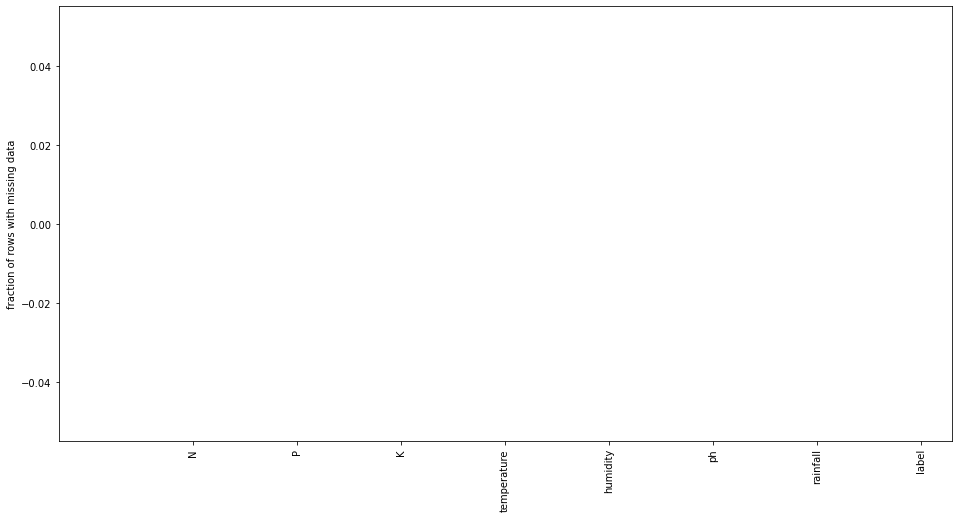

In [ ]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

In [ ]:
df.size

16272

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
df['label'].value_counts()

rice           100
banana         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
maize          100
mango          100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
cotton          86
jute            31
coffee          17
Name: label, dtype: int64

<AxesSubplot:>

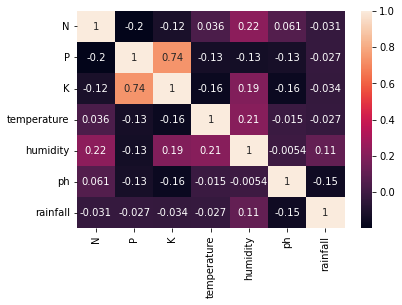

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [ ]:
acc = []
model = []

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))



Logistic Regression's Accuracy is:  0.9533169533169533
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        27
      banana       1.00      1.00      1.00        15
   blackgram       0.70      0.88      0.78        16
    chickpea       1.00      1.00      1.00        22
     coconut       1.00      0.90      0.95        20
      coffee       1.00      0.50      0.67         2
      cotton       0.96      1.00      0.98        22
      grapes       1.00      1.00      1.00        20
        jute       0.25      0.33      0.29         3
 kidneybeans       0.94      1.00      0.97        17
      lentil       0.96      0.96      0.96        26
       maize       1.00      0.95      0.97        20
       mango       1.00      1.00      1.00        16
   mothbeans       0.90      0.83      0.86        23
    mungbean       1.00      1.00      1.00        22
   muskmelon       1.00      1.00      1.00        21
      orange       1.00   

In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

accuracy = metrics.accuracy_score(Ytest, predicted_values)

print("Logistic Regression's Accuracy using Bottom-up approach: ", accuracy)


# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'

# Open the file to save as pkl file
LR_Model_pkl = open('./model.pkl', 'wb')

pickle.dump(LogReg, LR_Model_pkl)

# Close the pickle instances
LR_Model_pkl.close()

Logistic Regression's Accuracy using Bottom-up approach:  0.9533169533169533
